# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [62]:
# Imports
# Packages for numerics + dataframes
### YOUR CODE HERE ###
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
# Packages for visualization
### YOUR CODE HERE ###

# Packages for date conversions for calculating trip durations
### YOUR CODE HERE ###

# Packages for OLS, MLR, confusion matrix
### YOUR CODE HERE ###

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") # index_col parameter specified to avoid "Unnamed: 0" column when reading in data from csv

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


==> ENTER YOUR RESPONSE HERE 

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [4]:
# Start with `.shape` and `.info()`
### YOUR CODE HERE ###
df = df0.copy()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [5]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
df.isna()
df.drop_duplicates()
### YOUR CODE HERE ###

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


Use `.describe()`.

In [6]:
# Use .describe()
### YOUR CODE HERE ###
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [7]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
### YOUR CODE HERE ###
df.isna().sum().sum()
df.drop_duplicates()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


Use `.describe()`.

In [8]:
# Use .describe()
### YOUR CODE HERE ###
df.describe()


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Task 2b. Convert pickup & dropoff columns to datetime


In [9]:
# Check the format of the data
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [10]:
# Convert datetime columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Convert `tpep_dropoff_datetime` to datetime format
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
### YOUR CODE HERE ###

### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [11]:
# Create `duration` column
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')
### YOUR CODE HERE ###

### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [13]:
### YOUR CODE HERE ###

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

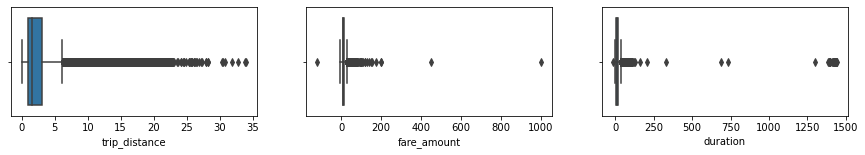

In [14]:
### YOUR CODE HERE ###
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
sns.boxplot(ax = axes[0],x = df['trip_distance'])
sns.boxplot(ax = axes[1],x = df['fare_amount'])
sns.boxplot(ax = axes[2],x = df['duration'])

**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

==> ENTER YOUR RESPONSE HERE

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [15]:
# Are trip distances of 0 bad data or very short trips rounded down?
### YOUR CODE HERE ###
sorted(set(df['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [16]:
### YOUR CODE HERE ###

df.loc[df['trip_distance']== 0,'trip_distance']

128      0.0
246      0.0
291      0.0
319      0.0
424      0.0
        ... 
22190    0.0
22325    0.0
22383    0.0
22566    0.0
22670    0.0
Name: trip_distance, Length: 148, dtype: float64

#### `fare_amount` outliers

In [18]:
### YOUR CODE HERE ###
df['fare_amount'].describe()

count    22699.000000
mean        13.033832
std         13.212462
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

**Question:** What do you notice about the values in the `fare_amount` column?

Impute values less than $0 with `0`.

In [26]:
# Impute values less than $0 with 0
df.loc[df['fare_amount']<0,'fare_amount'] = 0
### YOUR CODE HERE ###

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [27]:
### YOUR CODE HERE ###
def column_changer(column_list,iqr_factor):
    
    for col in column_list:
        df.loc[df[col]<0,col]=0
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        
        
    df.loc[df[col] > upper_threshold , col] = upper_threshold

#### `duration` outliers


In [28]:
# Call .describe() for duration outliers
column_changer(['fare_amount'], 6)
### YOUR CODE HERE ###

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [29]:
# Impute a 0 for any negative values
df.loc[df['duration']<0,'duration'] = 0
### YOUR CODE HERE ###

In [30]:
# Impute the high outliers
column_changer(['duration'],6)
### YOUR CODE HERE ###

### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [31]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].astype('string') + " "+ df['DOLocationID'].astype('string')

### YOUR CODE HERE ###

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [32]:
### YOUR CODE HERE ###
grouped = df.groupby('pickup_dropoff').mean(numeric_only = True)[['trip_distance']]


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [33]:
# 1. Convert `grouped` to a dictionary
### YOUR CODE HERE ###
grouped_dict = grouped.to_dict()
# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']
### YOUR CODE HERE ###

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [34]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
### YOUR CODE HERE ###
df['mean_distance'] = df['pickup_dropoff']
# 2. Map `grouped_dict` to the `mean_distance` column
### YOUR CODE HERE ###
df['mean_distance'] = df['mean_distance'].map(grouped_dict)
# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_distance']]
### YOUR CODE HERE ###


,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [35]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
# Create a dictionary where keys are unique pickup_dropoffs and values are
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']
# mean trip duration for all trips with those pickup_dropoff combos
### YOUR CODE HERE ###
df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict)
# Confirm that it worked
### YOUR CODE HERE ###
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [36]:
# Create 'day' col
### YOUR CODE HERE ###
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()
df['month'] = df['tpep_pickup_datetime'].dt.month_name().str.lower()
# Create 'month' col
### YOUR CODE HERE ###

#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [37]:
# Create 'rush_hour' col
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0
### YOUR CODE HERE ###
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1 
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0 
    return val 
    
# If day is Saturday or Sunday, impute 0 in `rush_hour` column
### YOUR CODE HERE ###

In [38]:
### YOUR CODE HERE ###
df['rush_hour'] = df.apply(rush_hourizer, axis=1)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,day,month,rush_hour,pickup_dropoff,mean_distance,mean_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,saturday,march,0,100 231,3.521667,22.847222
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,tuesday,april,0,186 43,3.108889,24.470370
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,friday,december,1,262 236,0.881429,7.250000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,sunday,may,0,188 97,3.700000,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,saturday,april,0,4 112,4.435000,14.616667


In [39]:
# Apply the `rush_hourizer()` function to the new column
### YOUR CODE HERE ###

### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

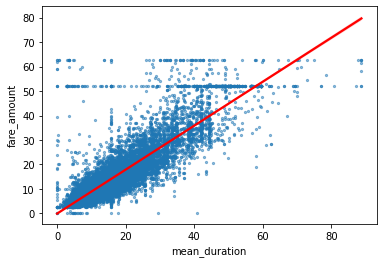

In [40]:
# Create a scatterplot to visualize the relationship between variables of interest
sns.regplot(x= df['mean_duration'] ,  y = df['fare_amount'],scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
sns.set(style = 'whitegrid')
### YOUR CODE HERE ###


The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [41]:
### YOUR CODE HERE ###
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

Examine the first 30 of these trips.

In [42]:
# Set pandas to display all columns
df[df['fare_amount']==52].head(30)
### YOUR CODE HERE ###

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,day,month,rush_hour,pickup_dropoff,mean_distance,mean_duration
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,...,5.54,0.3,72.92,36.800000,sunday,march,0,236 132,19.211667,40.500000
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,...,0.00,0.3,52.80,66.850000,saturday,june,0,132 163,19.229000,52.941667
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,...,0.00,0.3,52.80,0.966667,saturday,november,0,132 132,2.255862,3.021839
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,...,0.00,0.3,52.80,29.183333,wednesday,december,0,132 79,19.431667,47.275000
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,...,5.76,0.3,73.20,29.483333,sunday,september,0,132 234,17.654000,49.833333
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,...,5.54,0.3,62.84,39.833333,tuesday,february,1,132 48,18.761905,58.246032
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,...,5.76,0.3,58.56,15.616667,monday,june,0,228 88,4.730000,15.616667
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,...,5.76,0.3,58.56,45.450000,thursday,august,0,132 48,18.761905,58.246032
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,...,5.76,0.3,58.56,42.850000,tuesday,september,0,186 132,17.096000,42.920000
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,...,0.00,0.3,57.80,71.583333,sunday,april,0,132 148,17.994286,46.340476


**Question:** What do you notice about the first 30 trips?

==> ENTER YOUR RESPONSE HERE

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [43]:
### YOUR CODE HERE ###
df2 =df.copy()
df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   rush_hour        22699 non-null  int64  
 4   mean_distance    22699 non-null  float64
 5   mean_duration    22699 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


In [ ]:
### YOUR CODE HERE ###

### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

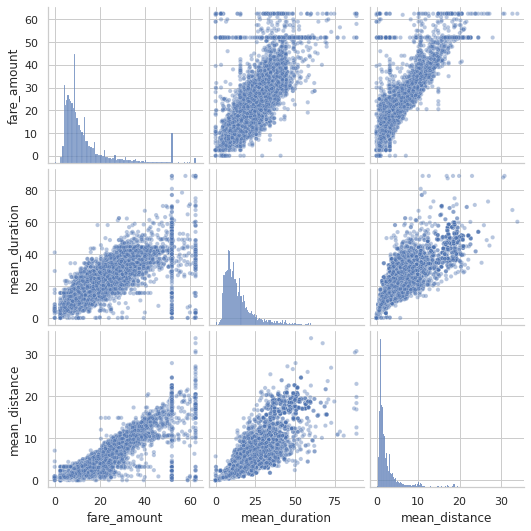

In [46]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             );
### YOUR CODE HERE ###

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [47]:
# Correlation matrix to help determine most correlated variables

df2.corr(method='pearson')
### YOUR CODE HERE ###

,VendorID,passenger_count,fare_amount,rush_hour,mean_distance,mean_duration
VendorID,1.000000,0.266463,0.001045,-0.002874,0.004741,0.001876
passenger_count,0.266463,1.000000,0.014942,-0.022035,0.013428,0.015852
fare_amount,0.001045,0.014942,1.000000,-0.020075,0.910185,0.859105
rush_hour,-0.002874,-0.022035,-0.020075,1.000000,-0.039725,-0.021583
mean_distance,0.004741,0.013428,0.910185,-0.039725,1.000000,0.874864
mean_duration,0.001876,0.015852,0.859105,-0.021583,0.874864,1.000000


Visualize a correlation heatmap of the data.

Text(0.5, 1.0, 'Correlation heatmap')

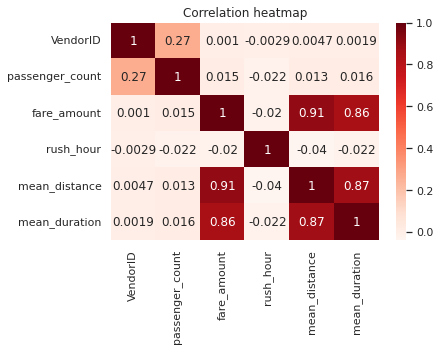

In [49]:
# Create correlation heatmap
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap')

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

Try modeling with both variables even though they are correlated.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [50]:
### YOUR CODE HERE ###
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   rush_hour        22699 non-null  int64  
 4   mean_distance    22699 non-null  float64
 5   mean_duration    22699 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [52]:
# Remove the target column from the features
# X = df2.drop(columns='fare_amount')
### YOUR CODE HERE ###
X= df2.drop(columns = 'fare_amount')
# Set y variable
### YOUR CODE HERE ###
y = df2[['fare_amount']]
# Display first few rows
### YOUR CODE HERE ###
X.head()

,VendorID,passenger_count,rush_hour,mean_distance,mean_duration
0,2,6,0,3.521667,22.847222
1,1,1,0,3.108889,24.470370
2,1,1,1,0.881429,7.250000
3,2,1,0,3.700000,30.250000
4,2,1,0,4.435000,14.616667


### Task 8b. Pre-process data


Dummy encode categorical variables

In [53]:
# Convert VendorID to string
### YOUR CODE HERE ###
X['VendorID']=X['VendorID'].astype('string')
# Get dummies
X= pd.get_dummies(X,drop_first = True)
X.head()
### YOUR CODE HERE ###

,VendorID,passenger_count,rush_hour,mean_distance,mean_duration
0,2,6,0,3.521667,22.847222
1,1,1,0,3.108889,24.470370
2,1,1,1,0.881429,7.250000
3,2,1,0,3.700000,30.250000
4,2,1,0,4.435000,14.616667


### Normalize the data

Use `StandardScaler()` and `fit_transform()` to standardize the X variables. Assign the results to a variable called `X_scaled`.

In [55]:
# Standardize the X variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)
### YOUR CODE HERE ###

[[ 0.8931955   3.39065627 -0.64959666  0.17093801  0.83195364]
 [-1.11957573 -0.4997803  -0.64959666  0.05495383  0.99296921]
 [-1.11957573 -0.4997803   1.53941679 -0.57092814 -0.7152838 ]
 ...
 [ 0.8931955  -0.4997803  -0.64959666 -0.62633441 -0.77886169]
 [ 0.8931955  -0.4997803  -0.64959666 -0.23485053  0.21719198]
 [-1.11957573 -0.4997803  -0.64959666 -0.40359028 -0.50145366]]


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [56]:
# Create training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 0)
#### YOUR CODE HERE ####


Instantiate your model and fit it to the training data.

In [59]:
# Fit your model to the training data
### YOUR CODE HERE ###
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [60]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train,y_train)
print('Coefficient of Determination : ',r_sq)
y_pred_train = lr.predict(X_train)
print('r2 Value : ', r2_score(y_train,y_pred_train))
print('MAE',mean_absolute_error(y_train,y_pred_train))
print('MSE',mean_squared_error(y_train,y_pred_train))
print('RMSE',np.sqrt(mean_squared_error(y_train,y_pred_train)))
### YOUR CODE HERE ###

Coefficient of Determination :  0.8398434585044773
r2 Value :  0.8398434585044773
MAE 2.1866664167754144
MSE 17.88973296349268
RMSE 4.229625629236313


### Test data

Calculate the same metrics on the test data.

In [65]:
# Evaluate the model performance on the testing data
### YOUR CODE HERE ###
r_sq = lr.score(X_test,y_test)
print('Coefficient of Determination :',r_sq)
y_pred_test = lr.predict(X_test)
print('r2 Value : ', r2_score(y_test,y_pred_test))
print('MAE',mean_absolute_error(y_test,y_pred_test))
print('MSE',mean_squared_error(y_test,y_pred_test))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_test)))

Coefficient of Determination : 0.8682583641795454
r2 Value :  0.8682583641795454
MAE 2.1336549840593877
MSE 14.32645415699895
RMSE 3.785030271609324


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [66]:
# Create a `results` dataframe


results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()
### YOUR CODE HERE ###



,actual,predicted,residual
5818,14.0,12.356503,1.643497
18134,28.0,16.314595,11.685405
4655,5.5,6.726789,-1.226789
7378,15.5,16.227206,-0.727206
13914,9.5,10.536408,-1.036408


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

Text(0.5, 1.0, 'Actual vs Predicted')

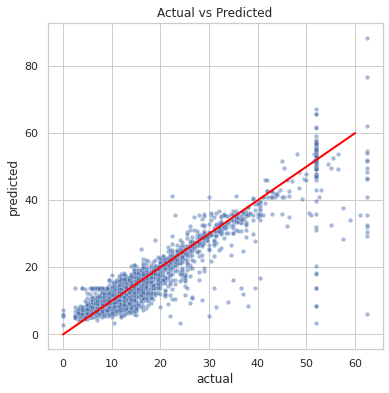

In [69]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style = 'whitegrid')
sns.scatterplot(x = 'actual', y='predicted',data = results,s =20,alpha = 0.5,ax= ax)
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs Predicted')
### YOUR CODE HERE ###

Visualize the distribution of the `residuals` using a histogram.

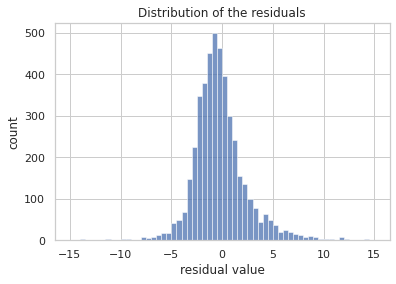

In [72]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');


In [73]:
# Calculate residual mean
results['residual'].mean()
### YOUR CODE HERE ###

-0.015442621528681316

Create a scatterplot of `residuals` over `predicted`.

In [ ]:
# Create a scatterplot of `residuals` over `predicted`
### YOUR CODE HERE ###

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [76]:
# Output the model's coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,VendorID,passenger_count,rush_hour,mean_distance,mean_duration
0,-0.054376,0.030755,0.110278,7.102335,2.806779


The coefficients reveal that `mean_distance` was the feature with the greatest weight in the model's final prediction. For every mile traveled, the fare amount increases by a mean of \\$7. Note, however, that because some highly correlated features were not removed, the confidence interval of this assessment is wider.

### Task 9d. Conclusion

1. What are the key takeaways from this notebook?

Multiple linear regression is a powerful tool to estimate a dependent continous variable from several independent variables.
Exploratory data analysis is useful for selecting both numeric and categorical features for multiple linear regression.
Fitting multiple linear regression models may require trial and error to select variables that fit an accurate model while maintaining model assumptions (or not, depending on your use case).

2. What results can be presented from this notebook?



==> ENTER YOUR RESPONSE HERE 